In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None, names = unames)
ratings = pd.read_csv('ml-1m/ratings.dat', sep ='::', header = None, names = rnames)
movies = pd.read_csv('ml-1m/movies.dat', sep ='::', header = None, names = mnames)

merge_data = pd.merge(ratings,users)

C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [387]:
data = pd.merge(merge_data,movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [388]:
movie_counts = data['title'].value_counts().sort_values(ascending = False)
print('가장 많이 평가된 영화: ', movie_counts.index[0])



가장 많이 평가된 영화:  American Beauty (1999)


In [389]:
sub_data = data.loc[data.title == movie_counts.index[0]].reset_index()

In [390]:
sub_data.head()

,index,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,107009,2,2858,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama
1,107010,3,2858,4,978297039,M,25,15,55117,American Beauty (1999),Comedy|Drama
2,107011,5,2858,4,978241390,M,25,20,55455,American Beauty (1999),Comedy|Drama
3,107012,6,2858,1,978236809,F,50,9,55117,American Beauty (1999),Comedy|Drama
4,107013,8,2858,5,978229817,M,25,12,11413,American Beauty (1999),Comedy|Drama


TypeError: 'AxesSubplot' object is not iterable

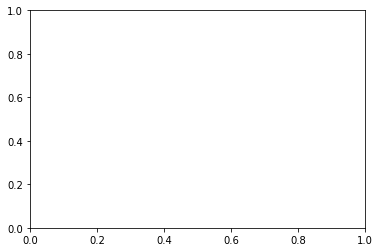

In [391]:
fig, ax = plt.subplot()
sub_data['rating'].value_counts().sort_index().plot(ax=ax, kind ='bar')

plt.show()

Text(0.5,1,'Rating distriubtion by gender forAmerican Beauty (1999)')

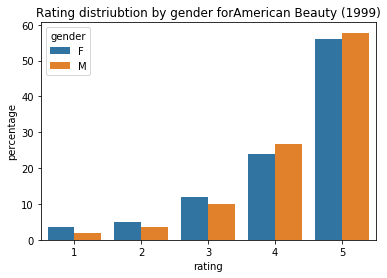

In [392]:
rating_counts = (sub_data.groupby(['gender'])['rating']
                .value_counts(normalize= True)
                .rename('percentage')
                .mul(100)
                .reset_index()
                .sort_values('rating'))

sns.barplot(x='rating', y ='percentage', hue='gender', data = rating_counts)
plt.title('Rating distriubtion by gender for' + sub_data['title'][0])
plt.show()

## 요약통계량 계산

In [77]:
pd.pivot_table(sub_data, values = 'rating',
              index = 'gender',
              aggfunc = [len, np.mean, np.median, np.std],
              fill_value = 0)

,len,mean,median,std
,rating,rating,rating,rating
gender,,,,
F,946,4.238901,5,1.063093
M,2482,4.347301,5,0.937943


## 직접해보기(미완성)

평가된 건수가 300개 이상인 영화 중 분산이 가장 큰 영화를 선택하여 아래를 확인.
1. 해당 영화의 평점 분포
2. 성별 별로 평점 분포

In [87]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [85]:
counts = data['title'].value_counts()
sel_titles = counts.index[counts>300]

In [102]:
table = pd.pivot_table(data, values = 'rating',
                      index = 'title',
                      aggfunc = [len, np.std],
                      fill_value = 0)

In [105]:
movie = table.loc[sel_titles].sort_values(by = ('std', 'rating'), ascending = False)
movie.head()

,len,std
,rating,rating
Dumb & Dumber (1994),660,1.321333
"Blair Witch Project, The (1999)",1237,1.316368
Natural Born Killers (1994),700,1.307198
Tank Girl (1995),358,1.277695
"Rocky Horror Picture Show, The (1975)",1233,1.260177


## 장르 나누기

In [114]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))  # union 함수를 통해

In [111]:
genre_labels

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [137]:
keyword_count = dict()     

for s in genre_labels: 
    keyword_count[s] = 0

print(keyword_count)        # 모든 카운트에 0을 할당시켜줌

{'Action': 0, 'Musical': 0, 'Western': 0, 'War': 0, 'Comedy': 0, 'Documentary': 0, 'Mystery': 0, 'Animation': 0, 'Romance': 0, 'Drama': 0, "Children's": 0, 'Thriller': 0, 'Film-Noir': 0, 'Fantasy': 0, 'Sci-Fi': 0, 'Horror': 0, 'Adventure': 0, 'Crime': 0}


In [140]:
for liste_keywords in movies['genres'].str.split('|'):
    if type(liste_keywords) == float and pd.isnull(liste_keywords):
        countinue
    for s in liste_keywords:
        if pd.notnull(s) : keyword_count[s] += 1
movies['genres'].str.split('|')

0          [Animation, Children's, Comedy]
1         [Adventure, Children's, Fantasy]
2                        [Comedy, Romance]
3                          [Comedy, Drama]
4                                 [Comedy]
5                [Action, Crime, Thriller]
6                        [Comedy, Romance]
7                  [Adventure, Children's]
8                                 [Action]
9            [Action, Adventure, Thriller]
10                [Comedy, Drama, Romance]
11                        [Comedy, Horror]
12                 [Animation, Children's]
13                                 [Drama]
14            [Action, Adventure, Romance]
15                       [Drama, Thriller]
16                        [Drama, Romance]
17                              [Thriller]
18                                [Comedy]
19                                [Action]
20                 [Action, Comedy, Drama]
21                [Crime, Drama, Thriller]
22                              [Thriller]
23         

In [139]:
print(keyword_count)

{'Action': 503, 'Musical': 114, 'Western': 68, 'War': 143, 'Comedy': 1200, 'Documentary': 127, 'Mystery': 106, 'Animation': 105, 'Romance': 471, 'Drama': 1603, "Children's": 251, 'Thriller': 492, 'Film-Noir': 44, 'Fantasy': 68, 'Sci-Fi': 276, 'Horror': 343, 'Adventure': 283, 'Crime': 211}


딕셔너리를 리스트 형태로 바꾸기

In [142]:
keyword_occurences = []
for k,v in keyword_count.items():
    keyword_occurences.append([k,v])
keyword_occurences.sort(key = lambda x: x[1], reverse = True)

keyword_occurences

[['Drama', 3206],
 ['Comedy', 2400],
 ['Action', 1006],
 ['Thriller', 984],
 ['Romance', 942],
 ['Horror', 686],
 ['Adventure', 566],
 ['Sci-Fi', 552],
 ["Children's", 502],
 ['Crime', 422],
 ['War', 286],
 ['Documentary', 254],
 ['Musical', 228],
 ['Mystery', 212],
 ['Animation', 210],
 ['Western', 136],
 ['Fantasy', 136],
 ['Film-Noir', 88]]

,genre,counts
0,Drama,3206
1,Comedy,2400
2,Action,1006
3,Thriller,984
4,Romance,942


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

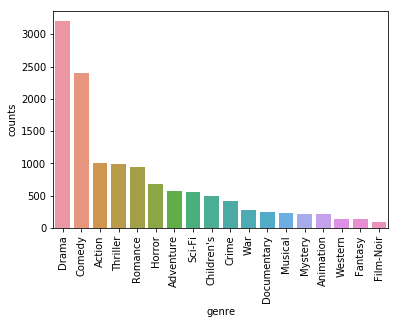

In [147]:
df = pd.DataFrame(keyword_occurences, columns= ['genre', 'counts'])    # 리스트를 데이터 프레임으로 정리하는것
df.head()
sns.barplot(x = 'genre', y = 'counts', data = df)
plt.xticks(rotation = 90)                           # x축은 가로  나열되서 글자를 알아볼수 없다. 
plt.show()

## 사용자의 나이 분포 살펴보기 

Text(0.5,0,'age')

Text(0.5,1,'Age distribution')

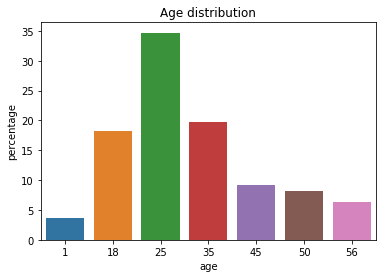

In [151]:
age_counts = (users['age']
             .value_counts(normalize = True)
             .rename('percentage')
             .mul(100)                    
             .reset_index())                 # index 변수를 새로 생성 
sns.barplot(x='index', y = 'percentage', data= age_counts)
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

In [152]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


Text(0.5,1,'Age distribution by gender')

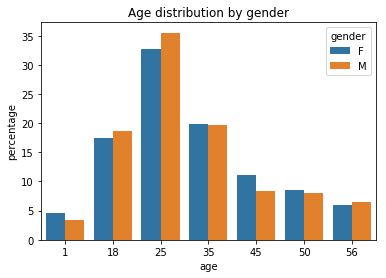

In [163]:
age_counts = (users.groupby(['gender'])['age']
              .value_counts(normalize=True)
              .rename('percentage')
              .mul(100)
              .reset_index()
              .sort_values('age'))
sns.barplot(x = 'age', y ='percentage', hue='gender', data = age_counts)
plt.title('Age distribution by gender')
plt.show()

Text(0.5,1,'Age distribution by gender')

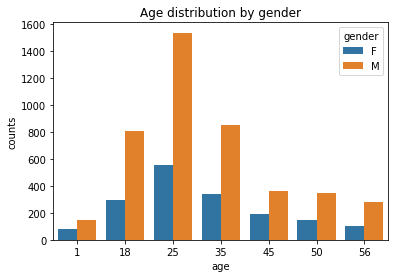

In [167]:
age_counts = (users.groupby(['gender'])['age']
              .value_counts(normalize=False)
              .rename('counts')
              .mul(1)
              .reset_index()
              .sort_values('age'))
sns.barplot(x = 'age', y ='counts', hue='gender', data = age_counts)
plt.title('Age distribution by gender')
plt.show()

## 1.4 사용자의 나이/직업에 대한 이차원 분할표

In [170]:
pd.crosstab(users['age'], users['occupation'], margins = True)   # 당연히 범주형 변수여야한다.

occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
age,,,,,,,,,,,,,,,,,,,,,
1,27,4,3,0,3,0,0,2,1,0,...,1,1,2,0,0,2,0,12,0,222
18,106,45,44,18,534,18,9,17,1,6,...,59,0,37,14,18,52,10,30,49,1103
25,298,156,113,68,200,52,76,253,6,29,...,181,0,133,73,58,202,23,15,108,2096
35,135,118,47,42,14,25,59,214,3,35,...,86,5,70,25,58,132,16,9,68,1193
45,66,80,30,17,3,10,31,74,1,11,...,32,7,26,17,38,57,9,2,22,550
50,46,70,18,16,5,6,40,80,2,7,...,22,27,19,8,45,35,9,2,23,496
56,33,55,12,12,0,1,21,39,3,4,...,7,102,15,7,24,22,3,2,11,380
All,711,528,267,173,759,112,236,679,17,92,...,388,142,302,144,241,502,70,72,281,6040


In [172]:
pd.set_option('display.max_columns', 30)                         # 전체 범위 늘리기
pd.crosstab(users['age'], users['occupation'], margins = True)   # 당연히 범주형 변수여야한다.

occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
age,,,,,,,,,,,,,,,,,,,,,,
1,27,4,3,0,3,0,0,2,1,0,163,1,1,1,2,0,0,2,0,12,0,222
18,106,45,44,18,534,18,9,17,1,6,29,7,59,0,37,14,18,52,10,30,49,1103
25,298,156,113,68,200,52,76,253,6,29,1,51,181,0,133,73,58,202,23,15,108,2096
35,135,118,47,42,14,25,59,214,3,35,1,31,86,5,70,25,58,132,16,9,68,1193
45,66,80,30,17,3,10,31,74,1,11,0,17,32,7,26,17,38,57,9,2,22,550
50,46,70,18,16,5,6,40,80,2,7,0,16,22,27,19,8,45,35,9,2,23,496
56,33,55,12,12,0,1,21,39,3,4,1,6,7,102,15,7,24,22,3,2,11,380
All,711,528,267,173,759,112,236,679,17,92,195,129,388,142,302,144,241,502,70,72,281,6040


## 확률 분포

Python에서 대부분의 확률 분포는 scipy.stats 라이브러리를 이용하여 사용 (검정, 분포 등이 다들어있다)

## 2.1 이항분포

In [174]:
from scipy.stats import binom

이항분포의 확률밀도함수 계산

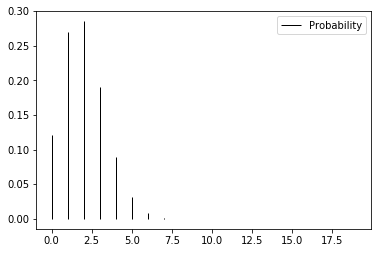

In [187]:
n, p = 20, 0.1                # 기아의 승률이 0.1이라고 생각하자.
rv = binom(n,p)
x = np.arange(0,n)          # 0부터 n까지의 범위를 만들어준다.
fig, ax = plt.subplots()
ax.vlines(x,0, rv.pmf(x), colors = 'k',  linestyles = '-',lw = 1, label='Probability')  # pmf 확률 질량함수, 
plt.legend()
plt.show()

In [193]:
p  = 0.9

In [194]:
binom.cdf(k = 15, n = n, p = p)

0.043174495284463356

In [195]:
binom.cdf(k = 19, n = n, p = p)

0.8784233454094307

어느 회사의 제품이 불량일 확률은 10%이다. 임의로 30개의 제품을 관측하였을 때,
1. 불량품이 6개 이상일 확률은?
2. 불량품이 7개 이상일 확률은?

In [202]:
n, p = 30, 0.1                
rv = binom(n,p)
x = np.arange(0,n) 
binom.cdf(k = 6, n = n, p = p)
1- binom.cdf(k = 7, n = n, p = p)

0.9741732113380902

0.007783619237921258

이항 분포의 난수 생성

In [204]:
np.random.seed(1)
binom.rvs(n =30, p =0.1, size = 10)  #rvs 아무거나 생성하는것

array([3, 4, 0, 2, 1, 1, 2, 2, 2, 3])

In [206]:
binom.rvs(n=30, p = 0.1, size = 10, random_state = 1)

array([3, 4, 0, 2, 1, 1, 2, 2, 2, 3])

## 균등 분포

In [207]:
from scipy.stats import uniform

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.98174771, 0.90160504, 1.25222922, 1.04185471, 0.84149804,
        1.04185471, 0.99176554, 1.01180121, 1.02181904, 0.93165854]),
 array([9.69506877e-05, 9.99189306e-02, 1.99740911e-01, 2.99562891e-01,
        3.99384871e-01, 4.99206850e-01, 5.99028830e-01, 6.98850810e-01,
        7.98672790e-01, 8.98494770e-01, 9.98316750e-01]),
 <a list of 10 Patch objects>)

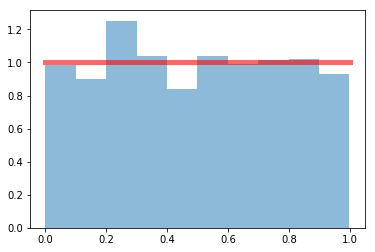

In [219]:
x = np.linspace(0,1,1000)                  #빨간색 라인 그리기, 1000개의 시퀀스 생성
fig, ax = plt.subplots()                    
ax.plot(x, uniform.pdf(x),                    
       'r-', lw =5, alpha =0.6, label = 'uniform.pdf')

r = uniform.rvs(size = 1000)
ax.hist(r, alpha = 0.5, normed = True)   # 히스토그림그릴때 normalized 해라.
plt.show()

어느 제품의 수명은 5년에서 10년 사이의 균등분포를 따른다고하자.
1. 해당 제품 수명의 평균 분산
2. 임의의 제품이 8년 이상의 수명을 가질 확률

In [224]:
u = uniform(loc = 5, scale = 5)  # 5부터 5 증가를 범위로 하자
print('mean = ', u.mean())
print('var = ', u.var())
print('prob = ', 1-u.cdf(x = 8))

mean =  7.5
var =  2.083333333333333
prob =  0.4


## 정규분포

In [225]:
from scipy.stats import norm

In [244]:
loc, scale = 0, 1 # 평균과 분산
norm.pdf(0.3, loc, scale)    # 함수값을 반환. 표준정규분포가 디폴트값

0.38138781546052414

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.01579877, 0.05213594, 0.15956756, 0.33177414, 0.39338933,
        0.35389241, 0.17378645, 0.07267433, 0.0205384 , 0.00631951]),
 array([-2.92530504, -2.2923443 , -1.65938357, -1.02642284, -0.39346211,
         0.23949862,  0.87245935,  1.50542008,  2.13838081,  2.77134154,
         3.40430228]),
 <a list of 10 Patch objects>)

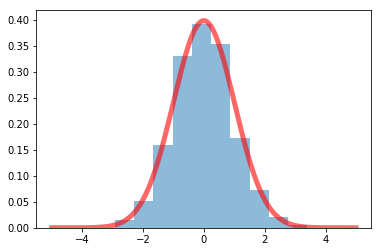

In [234]:
x = np.linspace(-5,5,200)      #  어떤 자료의 +,- 3시그마 밖이면 엄청 작다 0.00000000001 
                               #어떤 자료를 봤을때 3시그마 밖이라면 이상치라고 버리면됨         
fig, ax = plt.subplots()                    
ax.plot(x, norm.pdf(x),                    
       'r-', lw =5, alpha =0.6, label = 'norm.pdf')

r = norm.rvs(size = 1000)
ax.hist(r, alpha = 0.5, normed = True)  
plt.show()

In [238]:
normal = norm(loc = 0, scale = 1)
normal.pdf(0)

0.3989422804014327

In [239]:
normal.cdf(0)

0.5

In [242]:
normal.ppf(0.5)


0.0

난수 생성


In [243]:
normal.rvs(size = 10)

array([ 0.26168949, -1.38046189,  0.9200786 ,  0.01809921,  1.47586912,
        0.37319856,  1.29518318,  0.32775135, -0.08139688,  0.13438824])

t 분포는 안했다 복잡해서 

## 분포에 관한 추론

## 3.1 모평균(모분산을 알때, 모를때) 추론 및 신뢰구간, t-test

점추정: 주어진 iris 자료에 대해 각 종(Specis)에 대해 변수들의 점추정

In [304]:
iris = pd.read_csv('data_iris/iris.csv')
iris = iris.drop('Id', axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [305]:
iris.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [306]:
iris.groupby('Species').var()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


신뢰구간 추정
1. 모분산 시그마를 알때 모평균의 구간추정
2. 모분산을 모르는 경우, 모평균의 구간 추정
iris 자료를 토대로 iris-setosa 종에 대해 SepalLenthCm 모평균의 99% 신뢰구간을 추정해보자

In [307]:
alpha =0.01
X = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
Xbar = X.mean()

sigma = S = X.std()
n = len(X)
z0 = norm.ppf(1-alpha/2)

# 모분산을 안다고 가정하는 경우
ci1 = [Xbar -z0*sigma/np.sqrt(n), Xbar +z0*sigma/np.sqrt(n)]
print(ci1)

[4.877596017789616, 5.134403982210383]


In [308]:
from scipy.stats import t
t0 = t.ppf(1-alpha/2, df = n-1)
ci2 = [Xbar -t0*S/np.sqrt(n), Xbar +t0*S/np.sqrt(n)]
print(ci2)

[4.872405547497749, 5.13959445250225]


모평균의 유의성검정

In [309]:
T = (Xbar -6)/(S/np.sqrt(n))
T

-19.939991608146176

In [310]:
from scipy import stats
stats.ttest_1samp(X,6)

Ttest_1sampResult(statistic=-19.939991608146148, pvalue=3.6773626388839824e-25)

In [311]:
X = np.concatenate([X, [20]], axis = 0)
stats.ttest_1samp(X,6)

Ttest_1sampResult(statistic=-2.348735040695466, pvalue=0.022831164451641545)

이상치 어떻게 정리하냐?  Robust statistics 

## 독립 이표본의 모평균 비교 
두 모분산이 같다고 가정 / 분포는 정규분포를 따름

In [312]:
X1 = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
X2 = iris.loc[iris['Species'] == 'Iris-versicolor']['SepalLengthCm']

In [313]:
X1bar = X1.mean()
X2bar = X2.mean()
sigma1 = sigma2 = 0.2 
n1 = len(X1); n2 = len(X2)

z0 = (X1bar - X2bar)/np.sqrt(sigma**2/n1 + sigma2**2/n2)
z0

-16.226192003232697

In [316]:
2*norm.cdf(z0)

3.2926287133898994e-59

 모분산을 모를때 등분산
 모분산을 모를대는 스튜던트화 된 표본평균으로 t분포의 자표도를 근사없으로 추정하게 추정하여 검정을 진행한다.

In [315]:
stats.ttest_ind(X1, X2, equal_var = False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

## 직접해보기
1. veriscolor의 PetalLengthCm 모평균에 대한 95 % 신뢰구간계산
2. versicolor의 PetalLengthCm 모평균에 대한 유의성 검정.
H0 : mu = 5, H1:mu<5  alpha =0.01

3. versicolor 와 virginical 의 PetalLengthCm 모평균 비교

In [345]:
X = iris.loc[iris['Species'] == 'Iris-versicolor']['PetalLengthCm']
n = len(X)
Xbar = X.mean()
sigma = X.std()
alpha = 0.05

t0 = t.ppf(1-alpha/2, n-1)
interval = [Xbar - t0*sigma/ np.sqrt(n),  Xbar + t0*sigma/np.sqrt(n)]
interval

[4.126452778080923, 4.393547221919077]

In [352]:
(Xbar - 5)*np.sqrt(n)/ sigma  # 검정통계량
t.ppf(1-0.001/2, n-1)#유의 수준

-11.135279732161809

3.5004428913669883

## 모분산에 대한 추론

SepalLengthCm 의 붐포가 정규분포라를 가정하에서 위 가설에 대한 유의수준 5% 검정을 진행
Ho: 시그마^2 이 0.2 이다

In [357]:
X = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
n = len(X)
alpha = 0.05
S2 = X.var()
sigma2 = 0.2

# 검정 통계량
chi2 = (n-1)*S2 / sigma2
chi2



30.440999999999978

In [358]:
#유의확률

In [360]:
stats.chi2.cdf(chi2, df = n - 1)

0.017283311607342287

## 모분산비에 대한 추론(F-test)

iris 자료 내에 setosa, versicolor 종의 SepalLengthCm 모분산의 차이가 있는지 유의수준 5%에서 검정하고자한다.

Ho : sigma1,2 = sigma2,2 

In [361]:
X1 = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
X2 = iris.loc[iris['Species'] == 'Iris-versicolor']['SepalLengthCm']

In [362]:
n1 = len(X1)
n2 = len(X2)

In [363]:
S_12 = X1.var()
S_22 = X2.var()

In [370]:
# 검정통계량
F0 = S_12/S_22
F0

0.4663429131686986

In [371]:
#유희확률
stats.f.cdf(F0, n1-1, n2-1)

0.004328594181349908

## 직접해보기

1. Movielens 자료에서 가장 많이 평가된 영화자료를 선택하자.
2. x축에는 성별을 나열하고, y축에는 각 영화의 평점들을 boxplot(timestamp 무시)를 그리시오
3. 평점자료가 정규분포를 따른다는 가정하에, 성별마다 평점의 평균차이가 있는지 유의수준 5% 검정을 진행하시오
4. 마찬가지고  성별마다 평점의 부산 차이가 있는지 검정하시오.

In [372]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [379]:
movie_counts = data['title'].value_counts().sort_values(ascending = False)
print('가장 많이 평가된 영화: ', movie_counts.index[0])

movie_counts.head()


가장 많이 평가된 영화:  American Beauty (1999)


American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: title, dtype: int64

pandas.core.series.Series

In [416]:
rating_counts = (sub_data.groupby(['gender'])['rating']
                .value_counts(normalize= True)
                .rename('counts')
                .mul(100)
                .reset_index()
                .sort_values('rating'))

sns.boxplot(x='rating', y ='counts',data = rating_counts)
plt.title('boxplot
          by gender for' + sub_data['title'][0])
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-416-63ba8a2e2362>, line 9)

In [421]:
sub_data.head()

,index,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,107009,2,2858,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama
1,107010,3,2858,4,978297039,M,25,15,55117,American Beauty (1999),Comedy|Drama
2,107011,5,2858,4,978241390,M,25,20,55455,American Beauty (1999),Comedy|Drama
3,107012,6,2858,1,978236809,F,50,9,55117,American Beauty (1999),Comedy|Drama
4,107013,8,2858,5,978229817,M,25,12,11413,American Beauty (1999),Comedy|Drama


In [422]:
X1 = sub_data.loc[sub_data['gender'] == 'M']['rating']
X2 = sub_data.loc[sub_data['gender'] == 'F']['rating']

In [424]:
S1_2 = X1.var()
S2_2 = X2.var()

n1 = len(X1)
n2 = len(X2)

F0 = S1_2/S2_2
F0

0.7784126030747368

In [426]:
stats.f.cdf(F0, n1-1, n2-1)    # 이게 유의한거 이상하네...

1.1551976221590845e-06

In [427]:
X1.std()
X2.std()

0.937942836704421

1.0630934479173964

In [428]:
n1

2482

In [429]:
n2

946